Making figures for the gamification paper

In [2]:

import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection


ModuleNotFoundError: No module named 'matplotlib'

In [6]:
cohort_1_pre_test_scores = [0,4,4,4,5,5,5,5,6,6,6,7,7,7,7,8,8,8,9,9,10,10,10,12]
cohort_1_post_test_scores = [10,11,10,9,5,7,8,11,11,11,11,7,11,10,10,12,12,9,11,9,9,12,11,12]
cohort_2_pre_test_scores = [7,11,11,5,10,10,6,5,8,9,6,11,5,5,7,6,8]
cohort_2_post_test_scores = [10,11,9,8,10,10,11,10,10,10,10,9,9,11,9,9,10]


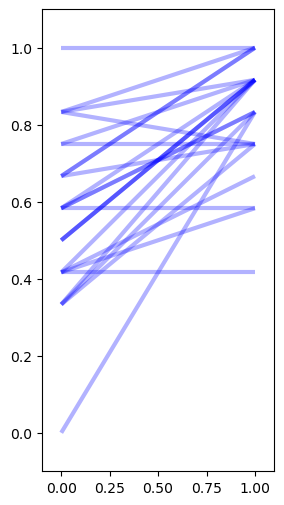

In [10]:
plt.rcParams["figure.figsize"] = (3,6)
fig, ax = plt.subplots()
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
#x_values = [0,1]
line_segments = []
colors = []
for pre, post in zip(cohort_1_pre_test_scores, cohort_1_post_test_scores):
    line_segments.append([[0,pre/12], [1,post/12]])
    colors.append('blue')
line_segments2 = LineCollection(line_segments, linestyles='solid', colors=colors, linewidth=3, alpha=0.3) #)
ax.add_collection(line_segments2)
plt.savefig('Line Graph Cohort 1.png')
plt.show()

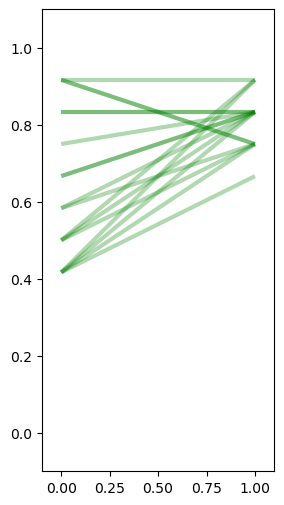

In [11]:
plt.rcParams["figure.figsize"] = (3,6)
fig, ax = plt.subplots()
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
#x_values = [0,1]
line_segments = []
colors = []
for pre, post in zip(cohort_2_pre_test_scores, cohort_2_post_test_scores):
    line_segments.append([[0,pre/12], [1,post/12]])
    colors.append('green')
line_segments2 = LineCollection(line_segments, linestyles='solid', colors=colors, linewidth=3, alpha=0.3) #)
ax.add_collection(line_segments2)
plt.savefig('Line Graph Cohort 2.png')
plt.show()

In [1]:
plt.rcParams["figure.figsize"] = (3,6)
fig, ax = plt.subplots()
ax.set_xlim(-0.1, 1.1)
ax.set_ylim(-0.1, 1.1)
#x_values = [0,1]
line_segments = []
colors = []
for pre, post in zip(cohort_1_pre_test_scores, cohort_1_post_test_scores):
    line_segments.append([[0,pre/12], [1,post/12]])
    colors.append('blue')
for pre, post in zip(cohort_2_pre_test_scores, cohort_2_post_test_scores):
    line_segments.append([[0,pre/12], [1,post/12]])
    colors.append('green')
line_segments2 = LineCollection(line_segments, linestyles='solid', colors=colors, linewidth=3, alpha=0.3) #)
ax.add_collection(line_segments2)
plt.savefig('Line Graph Cohort 2.png')
plt.show()

NameError: name 'plt' is not defined

Now to look into point biserial (pearson regression) to make sure the questions are valid.

In [13]:
import pandas as pd
import os
from scipy import stats
os.listdir()

['.ipynb_checkpoints',
 'Analysis of Gamification Data.xlsx',
 'cohort_1_posttest.csv',
 'cohort_1_pretest.csv',
 'cohort_1_pre_post_combined.csv',
 'Gamification Figures.ipynb',
 'Line Graph Cohort 1.png',
 'Line Graph Cohort 2.png',
 'Neuropsych Figures.ipynb']

In [15]:
cohort_1_scores = pd.read_csv('cohort_1_pre_post_combined.csv', index_col = 0)
cohort_1_scores.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12
Person Number,,,,,,,,,,,,
1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,1,1,0,1,1,1,1,1,1,0,1
3,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,1,1,0,0,1,1,0


In [77]:
len(cohort_1_scores.columns)

12

In [93]:
def print_point_biserial(dataframe): 
    output = {}
    individual_scores = []
    raw_scores = []
    number_questions = len(dataframe.columns)
    for index, row in dataframe.iterrows():
        total = 0
        for thing in range(1,number_questions+1,1):
            total += row['Q'+str(thing)]
        individual_scores.append(total)
        raw_scores.append(total) # this one will get sorted

    raw_scores.sort()
    ranks = {}
    for i, score in enumerate(raw_scores):
        if score not in ranks:
            ranks[score] = i+1
    rank_list = []
    for test_score in individual_scores:
        rank_list.append(ranks[test_score])
    for i in range(1,number_questions+1,1):
        question_name = 'Q'+str(i)
        question_status = dataframe[question_name].values
        stats_object = stats.pointbiserialr(question_status, rank_list)
        p_val = stats_object.pvalue
        pt_biserial_r = stats_object.correlation
        output[question_name] = {'pt_biserial': pt_biserial_r, 'p_value': p_val}
        print('Q'+str(i)+' '+str(pt_biserial_r)+' '+str(p_val))
    return(output)

In [94]:
pt_biserial_cohort_1_total = print_point_biserial(cohort_1_scores)

Q1 0.6385239904041444 1.3738790694841177e-08
Q2 0.6415998803817885 1.1122541468623118e-08
Q3 0.4382834153498083 0.0002920445421586709
Q4 0.5359749206018292 5.0124615708330815e-06
Q5 0.5771740532981868 5.960477504117107e-07
Q6 0.31982342533324404 0.009989013458045417
Q7 0.6668568696566657 1.787547410947204e-09
Q8 0.569166472836145 9.223584020462416e-07
Q9 0.5286877031018933 7.099057338638962e-06
Q10 0.42265914769913376 0.0005028986152058425
Q11 0.4288004133640463 0.0004074345284276372
Q12 0.4701605425764167 8.85490942644196e-05


In [97]:
tmp = pd.DataFrame(pt_biserial_cohort_1_total)
tmp.to_csv('Point_Biserial_Cohort_1_Combined.csv')

Q6 has a point biserial of only 0.32. The others are all above 0.4. I want to run this again with only the post scores and see if it is better there. 

In [98]:
pre = pd.read_csv('cohort_1_pretest.csv', index_col = 0)
post = pd.read_csv('cohort_1_posttest.csv', index_col = 0)

In [99]:
cohort_1_pre = print_point_biserial(pre)
tmp = pd.DataFrame(cohort_1_pre)
tmp.to_csv('Point_Biserial_Cohort_1_PreTest.csv')

Q1 0.608600639336424 0.0002191432128916123
Q2 0.4989197075024751 0.0036527912221265254
Q3 0.4962347930166854 0.0038696958370274177
Q4 0.10386710536479167 0.5715853512877522
Q5 0.5773244361181495 0.0005410899257730293
Q6 0.6038083594027932 0.0002532378514100159
Q7 0.6670614944576692 3.0529728013144085e-05
Q8 0.5520902986402414 0.0010529377527419349
Q9 0.4618118038553094 0.007796707132629031
Q10 0.4891666580458033 0.004494508741514947
Q11 0.43647855117665857 0.012505647202748054
Q12 0.23700289009724276 0.19153546061283222


In [100]:

cohort_1_post = print_point_biserial(post)
tmp = pd.DataFrame(cohort_1_post)
tmp.to_csv('Point_Biserial_Cohort_1_PostTest.csv')

Q1 0.5104460738975554 0.002836429271154728
Q2 0.3910508654892426 0.026892484101990678
Q3 0.4714972078536582 0.006447467219370294
Q4 0.703741653405199 7.0070493168597306e-06
Q5 0.5156497308549863 0.0025230357023706055
Q6 0.005769671253868555 0.9749985128579298
Q7 0.4347215205184981 0.012905921342429752
Q8 0.4305501666788076 0.013899451999904928
Q9 0.3506542594600598 0.049106826240434866
Q10 0.20166155200609032 0.2683793543051702
Q11 0.36184081149261405 0.04185261178081374
Q12 0.438703035266263 0.012013884716462224


It actually made it worse. That surprises me. Perhaps that question should be removed from analysis. 

In [101]:
pre = pd.read_csv('cohort_2_pretest.csv', index_col = 0)
post = pd.read_csv('cohort_2_posttest.csv', index_col = 0)
total = pd.read_csv('cohort_2_pre_post_combined.csv', index_col = 0)

In [103]:
cohort_2_pre = print_point_biserial(pre)
tmp = pd.DataFrame(cohort_2_pre)
tmp.to_csv('Point_Biserial_Cohort_2_PreTest.csv')

Q1 0.47419168863010447 0.05447250877080888
Q2 0.15255099281312945 0.5588754118598283
Q3 0.7598378771968088 0.00040140632990655155
Q4 0.829037398155804 3.8950172054663903e-05
Q5 0.005756641238231294 0.9825059338101296
Q6 0.4741916886301045 0.05447250877080888
Q7 0.433475285463439 0.08216670852502937
Q8 nan nan
Q9 0.1858889092427907 0.47502712860363744
Q10 0.814651472510413 6.829174285804018e-05
Q11 0.6421068185979072 0.00545034365001178


In [104]:
cohort_2_post = print_point_biserial(post)
tmp = pd.DataFrame(cohort_2_post)
tmp.to_csv('Point_Biserial_Cohort_2_PostTest.csv')

Q1 0.25275697559054117 0.32768841866272413
Q2 nan nan
Q3 nan nan
Q4 0.25275697559054117 0.32768841866272413
Q5 nan nan
Q6 0.25275697559054117 0.32768841866272413
Q7 nan nan
Q8 nan nan
Q9 0.3454811700560354 0.17439395981699282
Q10 0.5020160647711132 0.04003277801183261
Q11 0.45979980855653485 0.06331421502312279


In [105]:
cohort_2_total = print_point_biserial(total)
tmp = pd.DataFrame(cohort_2_total)
tmp.to_csv('Point_Biserial_Cohort_2_Combined.csv')

Q1 0.4407350190117775 0.009084595904183803
Q2 0.19667700052337075 0.2649144753264047
Q3 0.6899424626860036 6.354228576320069e-06
Q4 0.700691632889307 3.944112114560594e-06
Q5 0.13714865021659386 0.439250006479678
Q6 0.4407350190117775 0.009084595904183803
Q7 0.41057175468978135 0.01586950044912774
Q8 nan nan
Q9 0.3666590200692673 0.03293175726907026
Q10 0.6704346286660452 1.436986304343209e-05
Q11 0.6419395554510776 4.2735868718397866e-05


Questions 2, 3, 5, 7, and 8 have no variance for the post test becuase every single person got them correct. 